In [1]:
import pandas as pd
URL = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\web-page-phishing.csv")
URL.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [2]:
X = URL.drop("phishing",axis=1)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

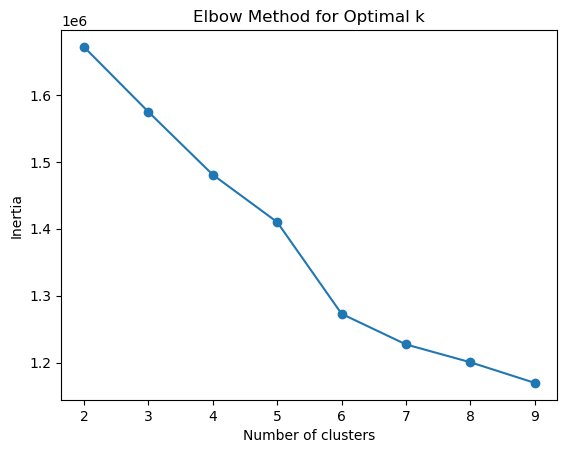

In [4]:
inertias = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [5]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [6]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

Silhouette Score for k=6: 0.516


This indicates fairly good separation. But let's see what happens when we increase and decrease this value by 1 given how this value is middle range. 

In [9]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

Silhouette Score for k=7: 0.492


In [10]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

Silhouette Score for k=5: 0.517


Increasing to 7 reduced the score to less than 0.5 (not very good) while reducing to 5 got us roughly the same score. It is possibly necessary to reduce the number of clusters. Let's run a for loop to do this.

In [12]:
for k in range(2,5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

Silhouette Score for k=2: 0.755
Silhouette Score for k=3: 0.610
Silhouette Score for k=4: 0.592


Based on the silhoutte score, setting the number of clusters to 2 has the best results. Let's do so. 

In [13]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
URL['Cluster'] = cluster_labels


In [14]:
URL['Cluster'].value_counts()

Cluster
0    95991
1     4086
Name: count, dtype: int64

The vast majority of URLs are in the first cluster. 

In [15]:
Table = pd.crosstab(URL['Cluster'],URL['phishing'])
Table

phishing,0,1
Cluster,,
0,63488,32503
1,227,3859


For the second cluster, the phishing URLs make up the vast majority of URLs. The opposite is true for the first cluster. 

Text(0, 0.5, 'Number of URLs')

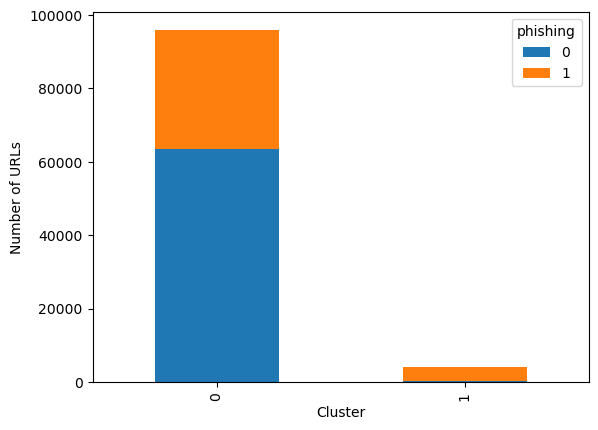

In [16]:
Table.plot(kind='bar',stacked=True)
plt.ylabel("Number of URLs")

While there is a cluster that is majority phishing, most phishing urls are part of the first larger cluster. This indicates that K Means clustering has limited usefulness in distinguishing between the two classes of urls. 

In [17]:
import pandas as pd
Phishing_Web = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\dataset_phishing.csv")
Phishing_Web.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [18]:
X = Phishing_Web.drop(["url","status"],axis=1)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

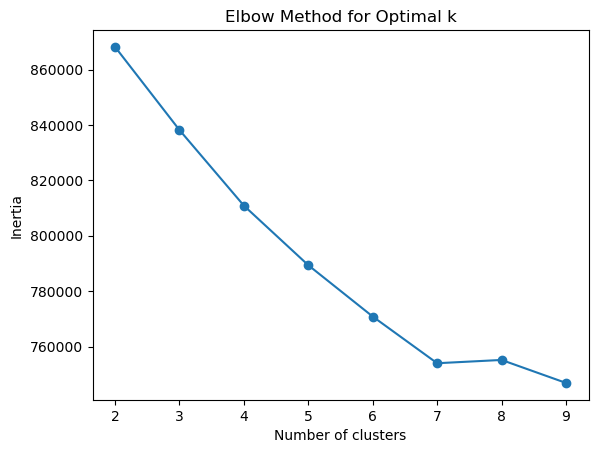

In [19]:
inertias = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


In [20]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

Silhouette Score for k=7: 0.073


This is not a good silhouette score. Let's do a for loop to try out lower values for k.  

In [21]:
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

Silhouette Score for k=2: 0.307
Silhouette Score for k=3: 0.072
Silhouette Score for k=4: 0.078
Silhouette Score for k=5: 0.070
Silhouette Score for k=6: 0.067


Setting k equal to 2 gives us the best score. However, this score indicates not much separability. 

In [22]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [23]:
Phishing_Web['Cluster'] = cluster_labels
Phishing_Web['Cluster'].value_counts()

Cluster
1    9825
0    1605
Name: count, dtype: int64

The vast majority of urls are in the second cluster. 

In [24]:
Table = pd.crosstab(Phishing_Web['Cluster'],Phishing_Web['status'])
Table

status,legitimate,phishing
Cluster,,
0,30,1575
1,5685,4140


For the larger cluster, the legitimate urls outnumber phishing urls. But for the smaller cluster, phishing urls make up almost the entire group. 

Text(0, 0.5, 'Number of URLs')

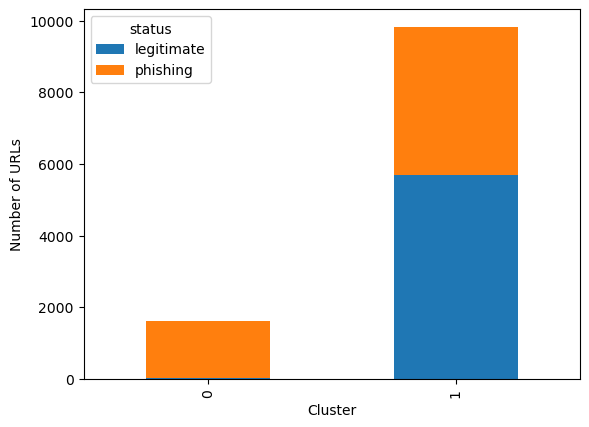

In [25]:
Table.plot(kind='bar',stacked=True)
plt.ylabel("Number of URLs")

Since the vast majority of phishing urls are in the cluster that is mostly legitimate urls, clustering can't very effectively distinguish them. 

In [26]:
Email = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\Phishing_Email.csv")
Email.head()

,Unnamed: 0,Email Text,Email Type,num_chars,num_words,avg_word_len,num_sentences,num_capitals,num_exclamations,num_question_marks,num_special_chars,num_digits,num_urls
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,1030.0,230.0,3.482609,9.0,0.0,2.0,0.0,59.0,9.0,0.0
1,1,the other side of * galicismos * * galicismo *...,Safe Email,479.0,91.0,4.274725,6.0,0.0,0.0,2.0,16.0,0.0,0.0
2,2,re : equistar deal tickets are you still avail...,Safe Email,1245.0,305.0,3.085246,7.0,0.0,0.0,1.0,95.0,63.0,0.0
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,688.0,96.0,5.500000,38.0,39.0,1.0,1.0,110.0,29.0,1.0
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,441.0,91.0,3.857143,13.0,0.0,0.0,0.0,27.0,2.0,0.0


In [27]:
X = Email.drop(["Unnamed: 0","Email Text","Email Type"],axis=1)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

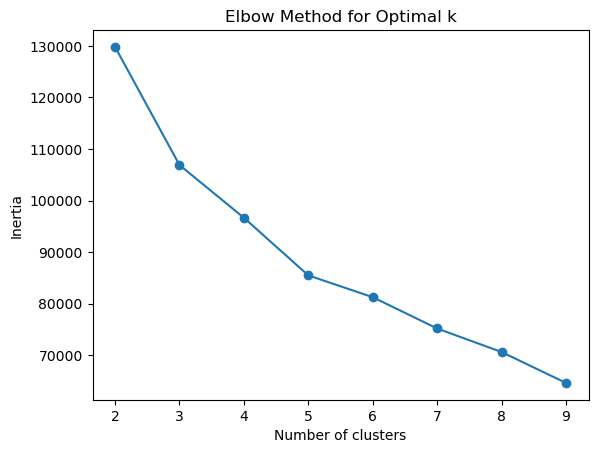

In [28]:
inertias = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [29]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

Silhouette Score for k=5: 0.353


This is a weak score. Let's do a for loop to try out lower k values. 

In [30]:
for k in  range(2,5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

Silhouette Score for k=2: 0.526
Silhouette Score for k=3: 0.397
Silhouette Score for k=4: 0.372


Since 2 gives us the best value, let's go with it (this value indicates the best separation between the clusters). 

In [31]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
Email['Cluster'] = cluster_labels
Email['Cluster'].value_counts()

Cluster
0    15440
1     2276
Name: count, dtype: int64

The vast majority of emails fall into the first cluster. 

In [32]:
Table = pd.crosstab(Email['Cluster'],Email['Email Type'])
Table

Email Type,Phishing Email,Safe Email
Cluster,,
0,6200,9240
1,778,1498


Interestingly enough, none of the clusters have a majority phishing email composition. Instead, both clusters have a safe email to phishing email ratio that is not too different from the roughly 60 - 40 ratio of safe email to phishing emails ratio in the entire dataset. 

Text(0, 0.5, 'Number of URLs')

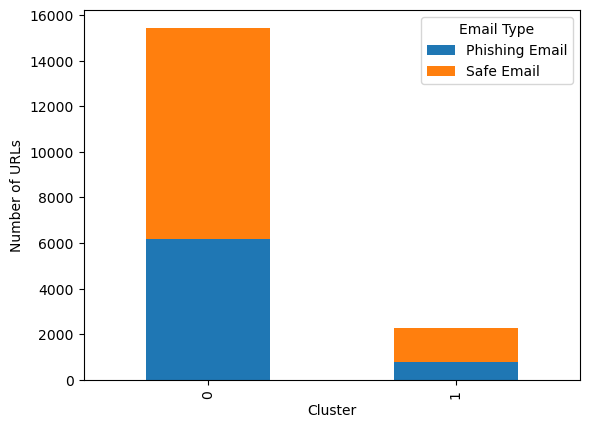

In [33]:
Table.plot(kind='bar',stacked=True)
plt.ylabel("Number of URLs")

Since the email type composition of both clusters is not too different, clustering is practically useless at distinguishing safe emails from phishing emails. 